# DAPT-622 Python Assignment 2

> Group 3

_Due by 21-FEB-2023_

The data for this homework assignment is sourced from the UCI Machine Learning Repository. This [link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) includes a brief description of all columns (features) available this dataset. You can download this dataset, called `winequality.csv`, from Canvas under the `Data` folder to your local computer and then read that file into a pandas dataframe. 

Answer the following questions based on this dataset. Submit a Jupyter Notebook that contains all your code that you used to answer these questions. You can post your submission on Canvas or via email (patelvj2@vcu.edu). The Jupyter Notebook must be fully executable with no/minimal changes (such as the location of the input file).

In [71]:
# Before running anything, Adding in the packages, as well as the data frame that we will be using for the rest of the code. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint #Pretty Print :) 

# Reading the csv file into the Data Frame
df = pd.read_csv(r"C:\Users\alvin\Python HW\data\winequality.csv")

# Checking the headers and first 5 to see what kinda data we have
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [72]:
# Checking to see what data types we are working with! 
df.dtypes

# After checking the data type as well as what we have, we re going to drop any unneeded columns 
# that are either non-integers or unnamed. 
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[-1], axis=1)

# Recheck the data frame to see if we deleted the correct ones. If not, no worries! 
# Just re-read the csv into the data frame try again~
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1. Plot histograms for all variables in this data set. Add a vertical line to show the average value of each variable. Add a chart title for each chart. [3 points]

In [73]:
# This is how we are going to find the verftical line value of every coloumns. 
#1. Create a list with all of the wine's mean values  
#2. Then add those values in when running the histogram. (doing that below)

#Create an empty list
wine_mean = []
# Run a for loop for the datafram coloums as that would give us Headers such as "Fixed acidity!"
for x in df.columns: 
    # This step will add(Append vs + operator is Append adds a single object at the end while 
    # the + operator is used for  when you add an specific array by concatenating the element)
    # the mean of the dataframe with the header. Dataframe[x].mean() is essentially saying 
    # hey, can you get the mean of that x column? 
    wine_mean.append((df[x].mean()))
#Printing the final result to make sure it ran smoothly 
print(wine_mean)

# If there is wine type in this column, it will break because that is a string coloumns that is trying to get the 
# mean operator activated on. Another way to do this is so that it breaks before wine type, but 
# it's much easier to just remove that coloumn completely as you won't use it for next couple step.

[7.2153070647991235, 0.3396659996921661, 0.31863321533014705, 5.443235339387428, 0.056033861782361305, 30.525319378174544, 115.7445744189626, 0.9946966338309937, 3.218500846544555, 0.5312682776666168, 10.491800831152897, 5.818377712790519]


In [74]:
# Creating the bin to be 50. This changes the size of the bar. Higher the number, 
# more separated the values become. 
# To see real big difference, tried 500 and it becomes super jagged. Also takes a bit :p 
BINS = 50

# creating the column variables.
num_cols = df.columns[0:]

# Calling the num of columns to see if we done it right. We should have an index and 
# the coloumn header values inside.
num_cols 


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

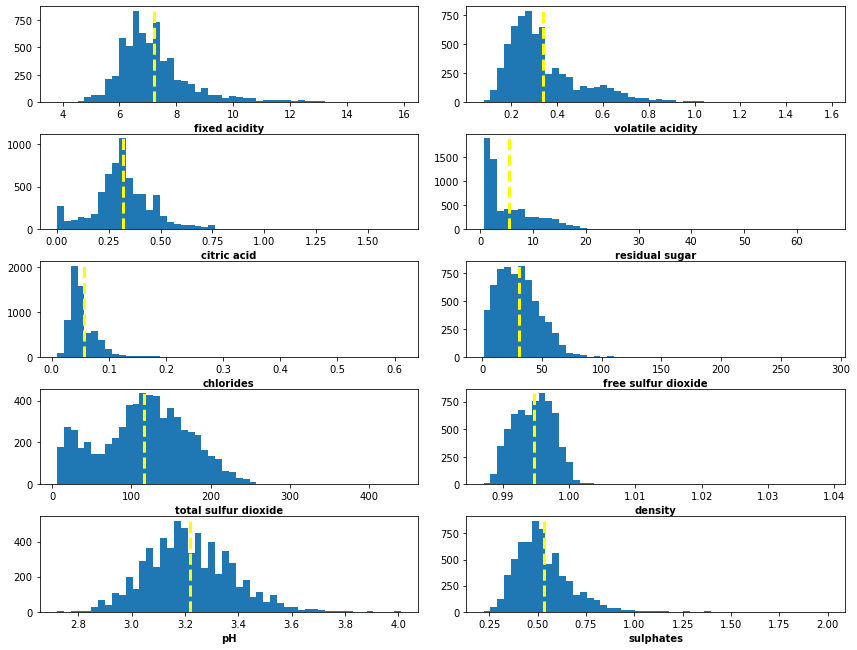

In [75]:
#2. Then add those values in when running the histogram.
# Define 10 subplots and arrange them into 5 rows and 2 columns. Using the fig size to change the size of the graphs.
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 9))

# Helps make the graphs all nicely organized :) 
fig.tight_layout()

# Running a for loop on the 10 subplots. The i is the index of which layout we are on, and the ax is the axes.  
for i, ax in enumerate(axes.flat):
    #By calling upon num of coloumns, we are able to identify which datafram we are going to use
    #to graph the histogram
    col = num_cols[i]
    #Command to create a histogram. Using Bin from above, ax as axis. 
    #axvline adds a vertical line across the Axes. It requires just a line, but added some colors
    #and formatting to make the line nice and clean :) 
    df[col].hist(bins=BINS, ax=ax, grid=False).axvline(wine_mean[i], color='Yellow', linestyle='dashed', linewidth=3)
    #Command to add labels of the graphs. This is just calling upon the coloum header :) 
    ax.set_xlabel(col, weight='bold', size=10)
    

2. Identify two features that are most correlated with each other. Visualize their relationship using an appropriate chart type. [3 points]

In [76]:
# creating correlation matrix
corr_matrix = df.corr()

# checking to seee the correlation matrix! 
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


      From this heat map we can see that  free sulfur dioxide and total sulfur dioxidelooks to be are
 two features that correlate the most with each other.


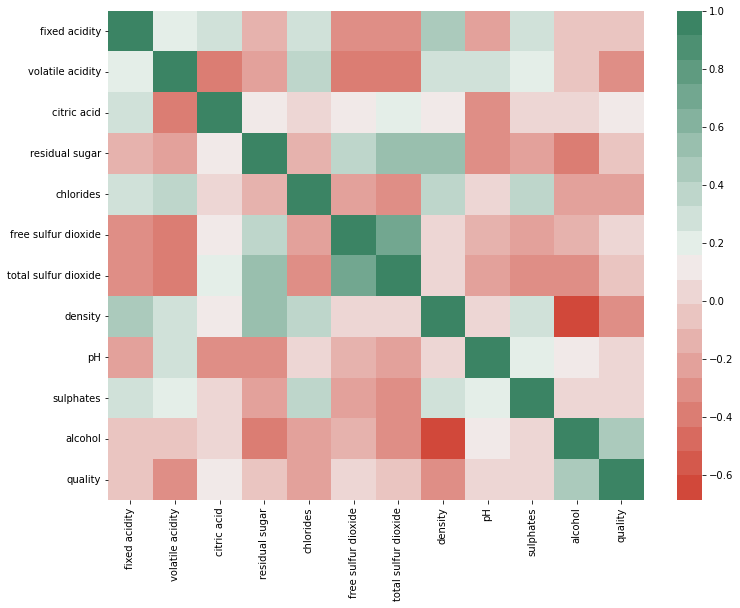

In [77]:
# Creating an cmap(color map) to use for later. It's going to make a diverging palette between two HUSL colors.
cmap = sns.diverging_palette(15, 150, n=20) # These two colors were very different from each other so I used them

# Configuring(Size of the plot)
plt.figure(figsize=(12, 9))

# Bringing up a heatmap of the correlation matrics and using the color map in order decide the schema.
sns.heatmap(corr_matrix, cmap=cmap)

print('      From this heat map we can see that  free sulfur dioxide and total sulfur dioxidelooks to be are') 
print(' two features that correlate the most with each other.')

      From this heat map we can see that  free sulfur dioxide and total sulfur dioxidelooks to be are
 two features that correlate the most with each other.


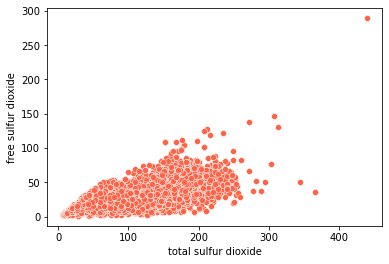

In [78]:
# Run a scatterplot with quality as its x axis and alcohol as its y variable. 
ax = sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', data=df, color='tomato')

print('      From this heat map we can see that  free sulfur dioxide and total sulfur dioxidelooks to be are') 
print(' two features that correlate the most with each other.')

3. Identify the feature that is most correlated with the wine quality and plot their relationship using an appropriate chart type. [3 points]

In [79]:
# Let's recheck the correlation matrix to determine which value has the highest correlation with quality
corr_matrix

print("From this correlation matrix, we can tell that wine quality and alcohol are more correlated with one another")

From this correlation matrix, we can tell that wine quality and alcohol are more correlated with one another


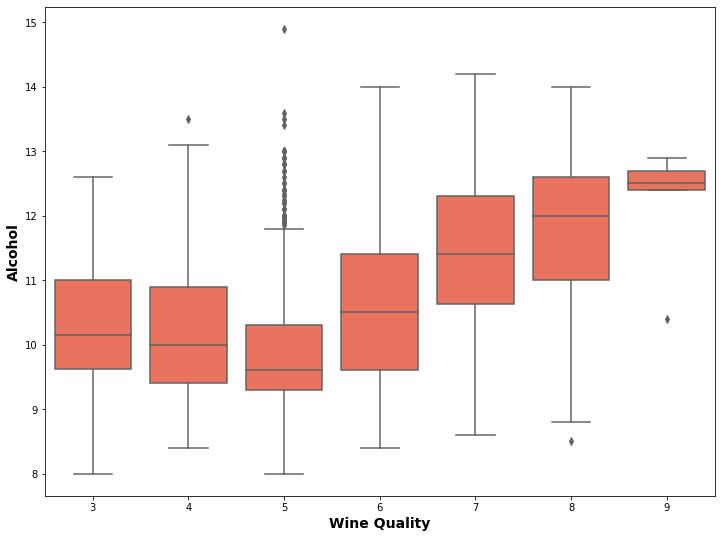

In [80]:
# Configuring the size of the plot once again
plt.figure(figsize=[12, 9])

# Run a scatterplot with quality as its x axis and alcohol as its y variable. 
ax = sns.boxplot(x='quality', y='alcohol', data=df, color='tomato')

#Adding in the labels
plt.xlabel('Wine Quality', fontsize=14, weight='bold')
plt.ylabel('Alcohol', fontsize=14, weight='bold');

4. Calculate average alcohol content for each wine quality score. Store the average alcohol content for the best (highest) quality wine in a variable called `avg_alcohol_for_best_wine` and print it using the following statement: 

`print(f'The average alcohol content for the best wine is {avg_alcohol_for_best_wine}.')` [1 point]

In [81]:
# There are multiple ways to do this, the method that we chose was
#1. Create a many list of each Scores
#2. Create a means score of the wine variables (Including the Avg_Alc for best wine) 
#3. Use a for loop of the entire length of the data frame to add running list of alcohol content
#4. Create a function called average 
#5. Call upon average for every single and store it within the mean score 
# variable created in step 2
#6. Use the print statement to get the result of the best wine and its alcohol content

# Creating list to store separate qualities
Score3 = []
Score4 = []
Score5 = []
Score6 = []
Score7 = []
Score8 = []
Score9 = []

# Creating a mean score of the wine variables
Q3=0
Q4=0
Q5=0
Q6=0
Q7=0
Q8=0

# Run a for loop from 0 all the way to the length of the dataframe quality so we iteratate on 
# Every single value. This will ensure that we have every single count of quality and its alcohol 
# within our running list of separate qualities. Len() gives length of the specific value is
for x in range(0,len((df["quality"]))):  
    # When calling upon dataframe for a single instance, you need the 
    # key and an integer. Imagine if it's like an excel sheet which needs row and coloumns. 
    # in this case, df[coloumn] = column header / row = x which is coming range of 0 - length.
    # Remember that it starts from 0 since its index starts with 0 instead of 1.
    if df["quality"][x] == 3: #checking to see if the quality and row x is equal to 3. Will do so for rest 
        Score3.append((df['alcohol'][x])) #appending the value 
    elif df["quality"][x] == 4:
        Score4.append(df['alcohol'][x])
    elif df["quality"][x] == 5:
        Score5.append(df['alcohol'][x])
    elif df["quality"][x] == 6:
        Score6.append(df['alcohol'][x])
    elif df["quality"][x] == 7:
        Score7.append(df['alcohol'][x])
    elif df["quality"][x] == 8:
        Score8.append(df['alcohol'][x])
    elif df["quality"][x] == 9:
        Score9.append(df['alcohol'][x])
    else:
        print(x) #printing out any other values that are not within 3-9. 
        
# Creating Avg Function
def avg(lst):
    return sum(lst) / len(lst) # Taking a sum of a list and divide by the quantity

# Calling upon the average function we created above on the list to 
# get the mean of the score. 
Q3 = avg(Score3)
Q4 = avg(Score4)
Q5 = avg(Score5)
Q6 = avg(Score6)
Q7 = avg(Score7)
Q8 = avg(Score8)

# Calling upon the average function of the highest score~
avg_alcohol_for_best_wine = avg(Score9)

# Printing out the result to see if the average makes sense
print(Score9)
# copied from the code above to get the final answer
print(f'The average alcohol content for the best wine is {avg_alcohol_for_best_wine}.')

[10.4, 12.4, 12.5, 12.7, 12.9]
The average alcohol content for the best wine is 12.18.


5. Calculate correlation coefficients between wine quality and all other features _separately for each wine type_. Identify any 
one feature that has contradictory relationships across the wine type. (For example, a feature has positive correlation with the wine quality for red wines, and negative correlation coefficients with the wine quality of white wines.) Plot the relationship of the selected feature with wine quality using an appropriate chart type. [5 points]

In [82]:
# Recreating data frame since we need the wine type to filter out the wine type
df = pd.read_csv(r"C:\Users\alvin\Python HW\data\winequality.csv")

# Dropping the first column
df = df.drop(df.columns[0], axis=1)

# Checking to see if we  have wine type but not the unnamed coloum 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red


In [83]:
# Separating the data fram by the types of wine
dfw=df[df['wine type']=='White'] # gets the subset of the df where all wine types are white

# There are 4898 records of white.
dfw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [84]:
# Separating the data fram by the types of wine
dfr=df[df['wine type']=='Red'] # gets the subset of the df where all wine entries are Red

# There are 1599  records of Red with the index ending at 6496 so we are all filtered properly.
dfr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
4898,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
4899,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
4900,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
4901,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4902,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red


In [85]:
# Creating the correlation matrixes for the white wine
corr_matrixW = dfw.corr() # running correlation matrix of the white wine dataframe

# Seeing the correlation Matrix of the white wine
corr_matrixW

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot:>

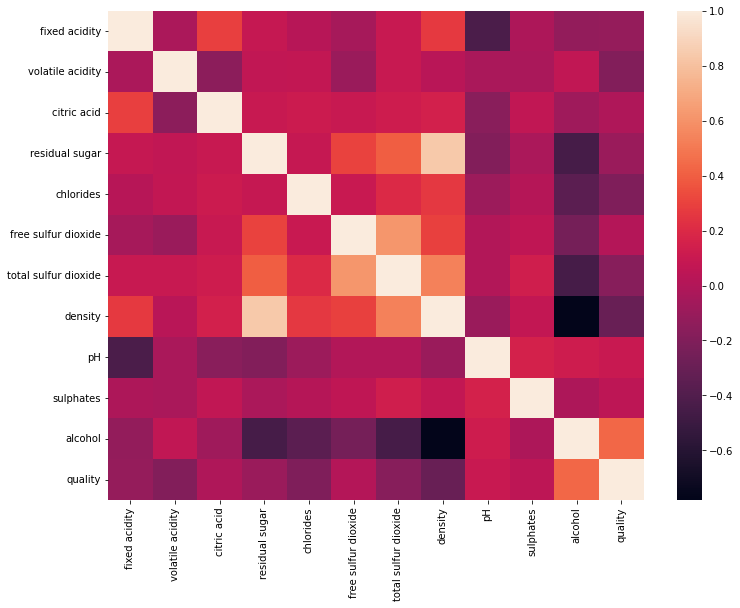

In [86]:
#Changing the size of the figure
plt.figure(figsize=(12, 9))

# create a heat map
sns.heatmap(corr_matrixW)

In [87]:
# Creating the correlation matrixes for the Red wine
Corr_matrixR = dfr.corr() # running correlation matrix of the red wine dataframe

# Seeing the correlation Matrix of the white wine
Corr_matrixR

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

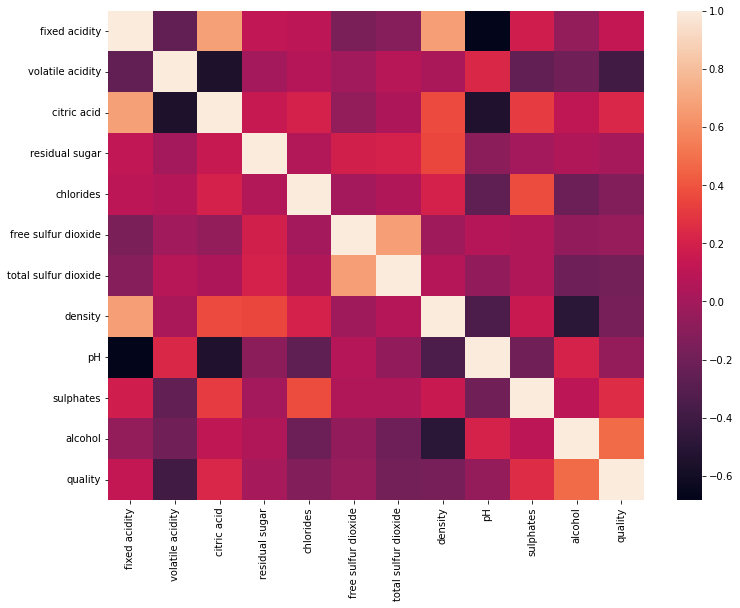

In [88]:
# Changing the size of the figure
plt.figure(figsize=(12, 9))

# Create a heat map of Red wine
sns.heatmap(Corr_matrixR)

From what we can gather,the average white wine fixed acidity is lower than that of the Red. White also seems to have bigger outliers from its mean/median.


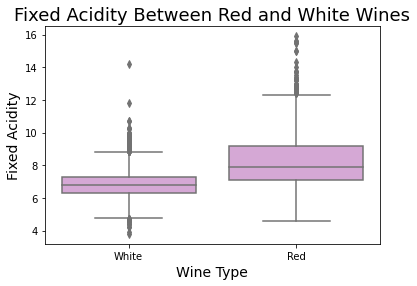

In [89]:
# Create plot 
wine_fixed = sns.boxplot(x='wine type', y='fixed acidity', data=df, color='plum')

# Assign axis labels
plt.ylabel('Fixed Acidity', fontsize=14)
plt.xlabel('Wine Type', fontsize=14)

# Set title
plt.title("Fixed Acidity Between Red and White Wines", fontsize=18);

print("From what we can gather,the average white wine fixed acidity is lower than that of the Red. White also seems to have bigger outliers from its mean/median.")

From what we can see, alcohol and residual between white and red wine show that white wines have higher residual sugar at every level of the alcohol level. Additionally white wine has one outlier that may be causing some of that issue. 


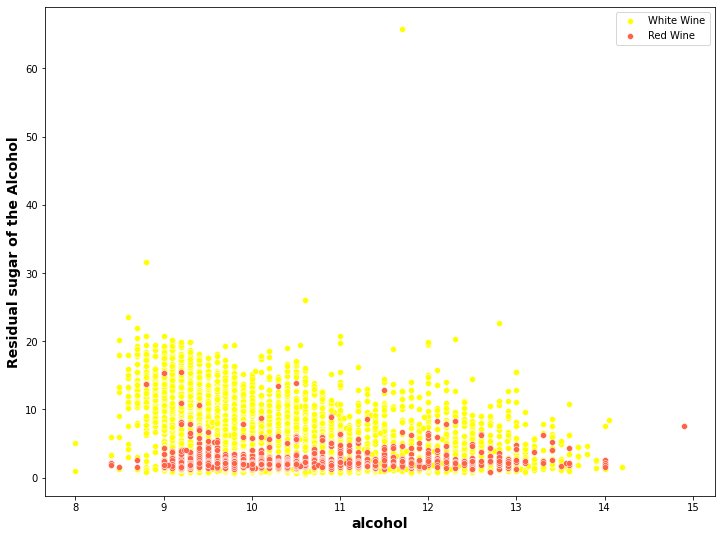

In [91]:
# I am going to be using the alcohol of the wine and residual sugar of the wine 
# I chose this one because I am convinced that the outlier is messing up my data :) 

#Configure the size~
plt.figure(figsize=[12, 9])

# You can graph on top of one another,so keep pushiung scatterplot with different colors to 
# showcase your findings~
ax = sns.scatterplot(x='alcohol', y='residual sugar', data=dfw, color='yellow', label= "White Wine")
ax = sns.scatterplot(x='alcohol', y='residual sugar', data=dfr, color='tomato', label= "Red Wine")

plt.xlabel('alcohol', fontsize=14, weight='bold')
plt.ylabel('Residual sugar of the Alcohol', fontsize=14, weight='bold');

print("From what we can see, alcohol and residual between white and red wine show that white wines have higher residual sugar at every level of the alcohol level. Additionally white wine has one outlier that may be causing some of that issue. ")

6. Create a dataframe (see example below) that contains the overall average for each variable as well as its average value for Red and White wines. Divide both averages by the overall average to create an index for each variable. Multiply the index columns by 100. Which two variables have the highest index? [5 points]

|                 | Red      | White    | Overall  | White_Index | Red_Index  |
|-----------------|----------|----------|----------|-------------|------------|
|fixed acidity	  | 8.319637 | 6.854788 | 7.215307 | 95.003409   | 115.305381 |
|volatile acidity |	0.527821 | 0.278241	| 0.339666 | 81.916094   | 155.3939   |
|.................|..........|..........|..........|.............|............|

In [92]:
# There are multiple ways to do this as well. Easiest method we found is creating a data frame
# from a dictionary. Data frame is simply a row of key/value where key is the name of the column
# and the value being called upon by the indexes.

# These are the steps we use to create a data frame. 
#1. Create a list of the values you are interested in 
#2. Create a dictionary based on them 
#3. Use panda, data frame to create a data frame
#4. Make sure to have the indexes set to not have the integer index shown to follow the example 

# After checking for the correlation, removing the wine type to be able to run
# integer related functions such as mean(). 
dflist = df.drop(df.columns[-1], axis=1) #Created for Overall Score
dfred = dfr.drop(df.columns[-1], axis=1) #Created for Red/ Red_Index
dfwhite = dfw.drop(df.columns[-1], axis=1) #Created for White/ White_Index

In [93]:
#1. Create a list of the values you are interested in. 
# we care for red, white, name of the columns, white infex, and red index. 
# There fore create 5 list that have the values we are interested in.
# We already have the mean from the wine_mean for overall :) 

# Creating an empty list Red to append values
Red = [] #This for loop runs on the str of the data frame column names!
for x in dfred.columns: #Running a for loop on the dataframe columns (This can be any of the list 
    # we created when loading in the dataframe as they all have the same number of columns/name of the columns)
    Red.append((dfred[x].mean())) #Adding the mean of the specific column from red wine list
    # so that we have just red wine values.

# Creating an empty list White to append values
White = []
for x in dfwhite.columns: #Running a for loop on the dataframe columns (This can be any of the list 
    # we created when loading in the dataframe as they all have the same number of columns/name of the columns)
    White.append((dfwhite[x].mean()))#Adding the mean of the specific column from white  wine list
    # so that we have just white wine values.
    
# Creating an empty list White to append values
Name =[] 
for x in dflist:#Running a for loop on the dataframe columns (This can be any of the list 
    # we created when loading in the dataframe as they all have the same number of columns/name of the columns)
    Name.append(x) #Adding the name in this case of the specific coloumns instead of means 
    # since this is a string variable! You can not MEAN a string. Just be aware of what is being put in! 

# Creating an empty list white_index to append values
White_index = []
for x in range(0,len(White)):# Running a for loop on the dataframe columns (This can be any of the list 
    # we created when loading in the dataframe as they all have the same number of columns). The difference
    # in this for loop is that it does not return a name for x value, it will return an integer value
    # from the White. Since we are looking for a specific value for a list White[x], and not a 
    # data frame, you just need a single value instead of df["Name of Column"][Value of Row].
    White_index.append((White[x]/wine_mean[x])*100)

# Creating an empty list Red_index to append values
Red_index = []
for x in range(0,len(Red)):
    Red_index.append((Red[x]/wine_mean[x])*100)
    
#Print the results to show how they look 
#sep (separate)= '\n' separates the printing results so they are right next to one another
print(Red,White,White_index,Red_index, Name, sep='\n')

[8.319637273295838, 0.5278205128205131, 0.2709756097560964, 2.5388055034396517, 0.08746654158849257, 15.874921826141339, 46.46779237023139, 0.9967466791744831, 3.311113195747343, 0.6581488430268921, 10.422983114446502, 5.6360225140712945]
[6.854787668436075, 0.27824111882401087, 0.33419150673743736, 6.391414863209486, 0.045772356063699476, 35.30808493262556, 138.36065741118824, 0.9940273764801896, 3.1882666394446693, 0.4898468762760325, 10.514267047774638, 5.87790935075541]
[95.00340882064616, 81.91609377334686, 104.88282158254275, 117.41941078609996, 81.68695607931129, 115.66819169096286, 119.53964849389986, 99.93271744087174, 99.06061211286162, 92.20329857214303, 100.21413117712865, 101.0231655781649]
[115.30538061067897, 155.3939791733257, 85.0431143769268, 46.641479655835795, 156.09586561821774, 52.00575178090301, 40.14684282481452, 100.20609754509712, 102.87749960675691, 123.88257885781313, 99.3440809846289, 96.86587554605893]
['fixed acidity', 'volatile acidity', 'citric acid', '

In [94]:
#2. Creating a dictionary based on the lists that we created
# When creating a dictionary, you need to have a key followed by :set of values,
# so it should look something like Key:Values. In this case, we follow the naming 
# convention set by example followed by our lists created in step 1 which are list of values.
Wine_dict = {'':Name, #Leaving it blank since that is how the example looked. 
        'Red':Red,
        'White':White,
        'Overall':wine_mean,
        'Red_index':Red_index,
        'white_index':White_index}

# printing the result 
pprint.pprint(Wine_dict)

{'': ['fixed acidity',
      'volatile acidity',
      'citric acid',
      'residual sugar',
      'chlorides',
      'free sulfur dioxide',
      'total sulfur dioxide',
      'density',
      'pH',
      'sulphates',
      'alcohol',
      'quality'],
 'Overall': [7.2153070647991235,
             0.3396659996921661,
             0.31863321533014705,
             5.443235339387428,
             0.056033861782361305,
             30.525319378174544,
             115.7445744189626,
             0.9946966338309937,
             3.218500846544555,
             0.5312682776666168,
             10.491800831152897,
             5.818377712790519],
 'Red': [8.319637273295838,
         0.5278205128205131,
         0.2709756097560964,
         2.5388055034396517,
         0.08746654158849257,
         15.874921826141339,
         46.46779237023139,
         0.9967466791744831,
         3.311113195747343,
         0.6581488430268921,
         10.422983114446502,
         5.6360225140712945],
 '

In [95]:
#3. Creating the data frame and setting the index to be our unnamed coloum headers to match the example
df = pd.DataFrame(Wine_dict).set_index('') 
df

,Red,White,Overall,Red_index,white_index
,,,,,
fixed acidity,8.319637,6.854788,7.215307,115.305381,95.003409
volatile acidity,0.527821,0.278241,0.339666,155.393979,81.916094
citric acid,0.270976,0.334192,0.318633,85.043114,104.882822
residual sugar,2.538806,6.391415,5.443235,46.641480,117.419411
chlorides,0.087467,0.045772,0.056034,156.095866,81.686956
free sulfur dioxide,15.874922,35.308085,30.525319,52.005752,115.668192
total sulfur dioxide,46.467792,138.360657,115.744574,40.146843,119.539648
density,0.996747,0.994027,0.994697,100.206098,99.932717
pH,3.311113,3.188267,3.218501,102.877500,99.060612


In [96]:
print("Two variables with the highest indexes are chlorides for red index as well as the volatile acidity for red index." )

Two variables with the highest indexes are chlorides for red index as well as the volatile acidity for red index.
